In [1]:
using Revise

In [2]:
using Pkg
Pkg.activate("../")
using TamboMap
using GeoMakie: save
using Colors

  Activating project at `~/research/TamboMap`
[ Info: Precompiling TamboMap [559d7682-380c-4d68-9dad-8c4c2a210f8f]


# Load up all the institutions

In [3]:
institutions = TamboMap.institutions_from_json("../institutions/");

# Make the map

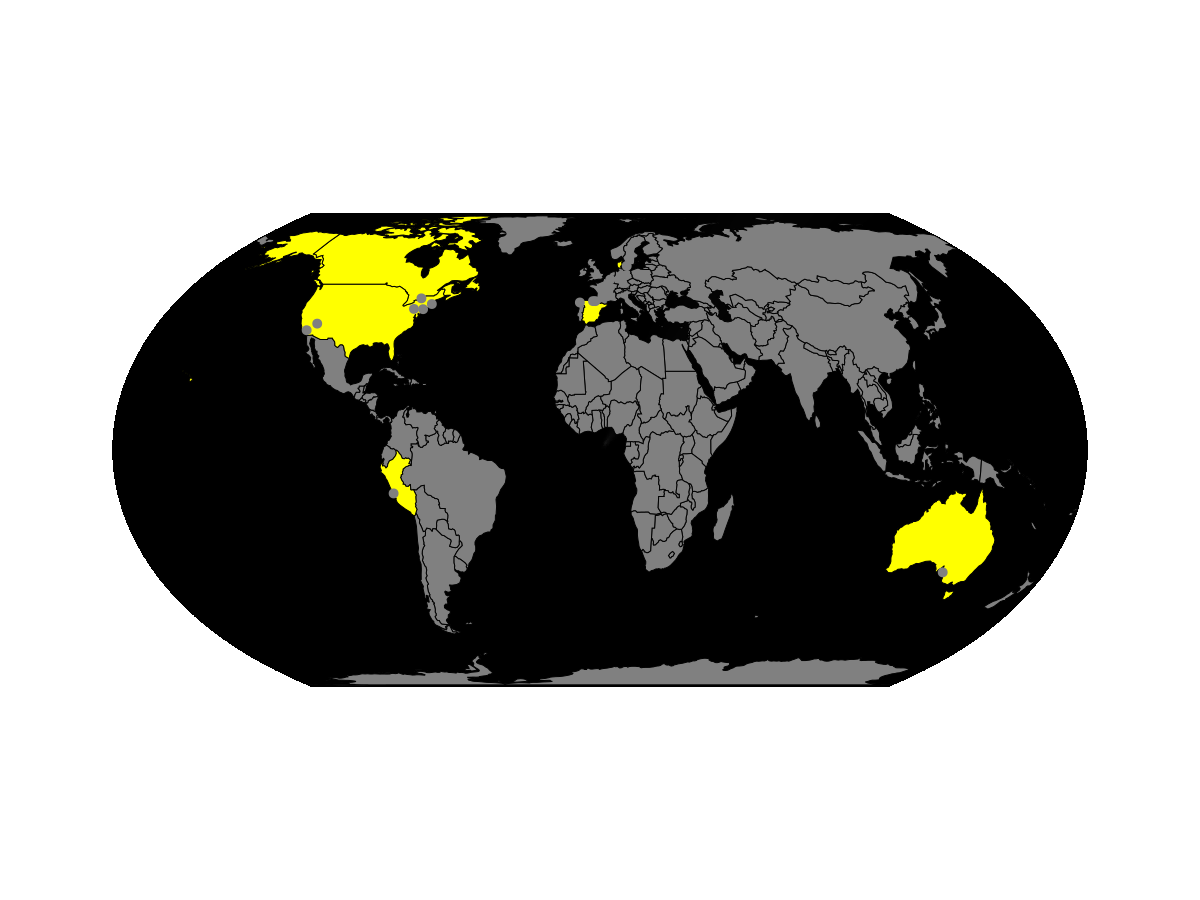

CairoMakie.Screen{IMAGE}


In [23]:
map = make_map(institutions)
display(map)
save("TAMBO_map.png", map)

# Or if we want to do more collaboration with the Tambo convenience chain

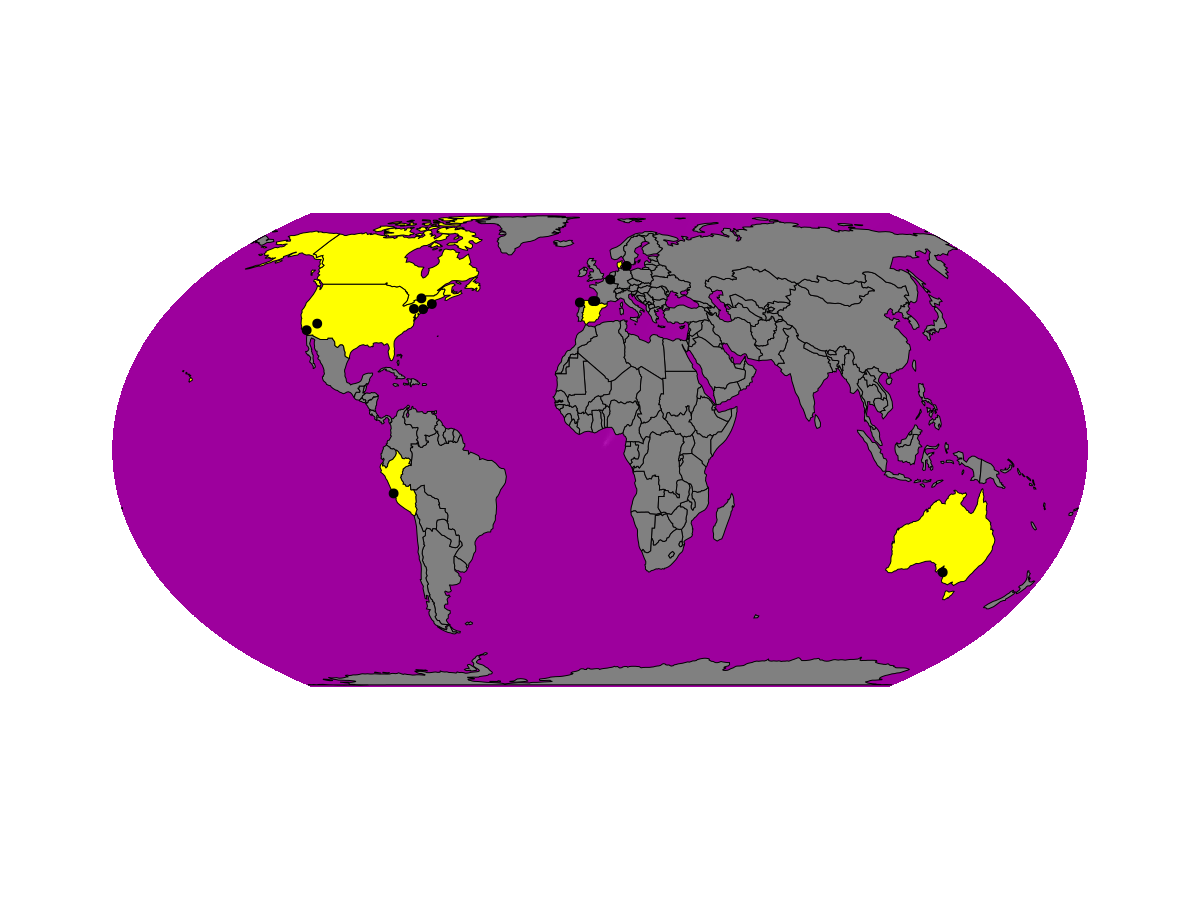

CairoMakie.Screen{IMAGE}


In [25]:
map = make_map(institutions, ocean_color=:magenta3, scatter_color=:black)
display(map)
save("branded_TAMBO_map.png", map)

# Or one inspired by the Miami Heat's iconic uniform

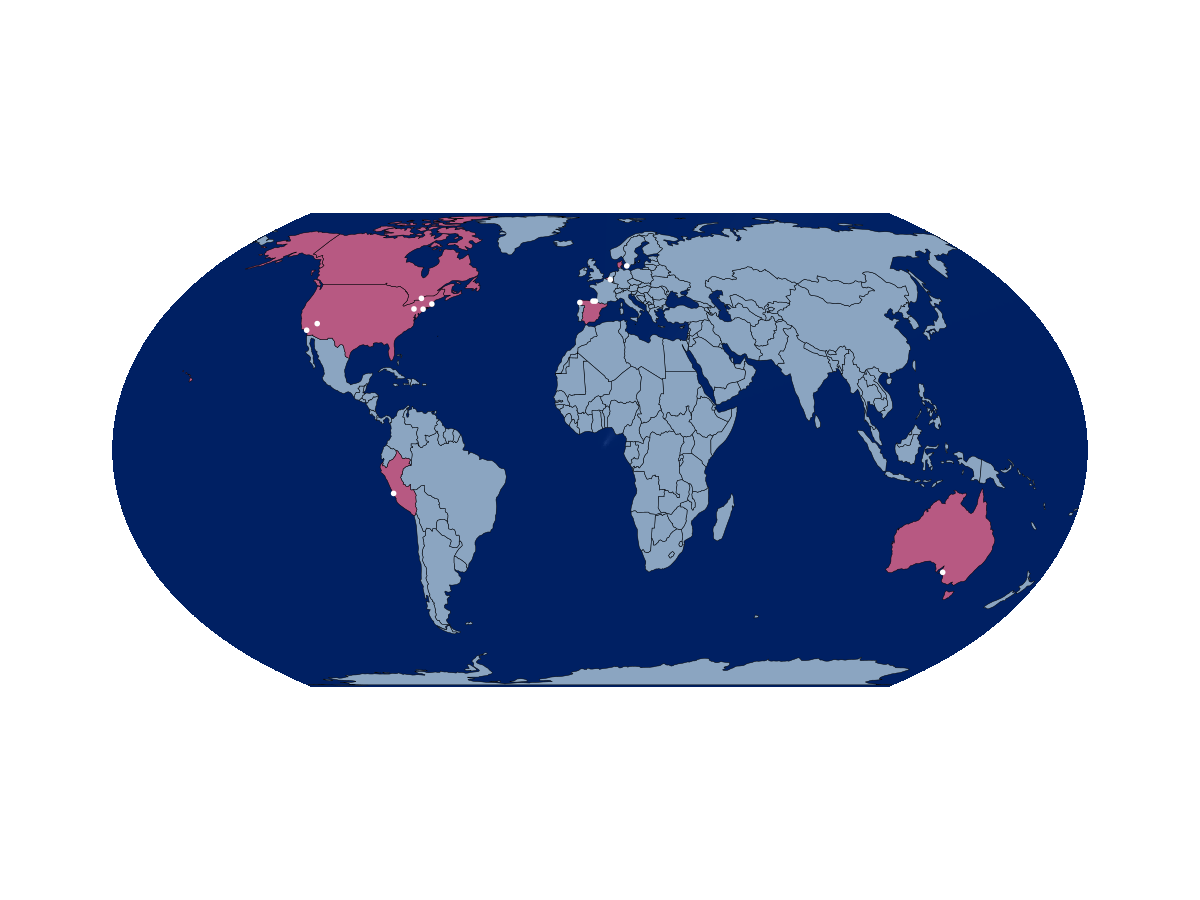

CairoMakie.Screen{IMAGE}


In [30]:
map = make_map(
    institutions, 
    ocean_color=colorant"#002B82",
    country_color_yes=colorant"#B75982",
    country_color_no=colorant"#8BA5C1",
    scatter_color=:white
)
display(map)
save("TAMBO_map_miami_nights.png", map)